In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv(r"C:\Users\kashi\Downloads\Global_Superstore2.csv",encoding='latin-1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [2]:
df.describe() #here we got the mean,median,mode etc. for the numercial values

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
#missing values

In [5]:
feature_with_null=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_with_null:
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

Postal Code 0.8051 % missing values


In [6]:
'postal code is the only column with missing values and it does not have such importance from the analysis point of view. It does not affect the sales directly and we have the region column which is helpful in the analysis  '

'postal code is the only column with missing values and it does not have such importance from the analysis point of view. It does not affect the sales directly and we have the region column which is helpful in the analysis  '

# "So we will drop the column postal code."


In [7]:
df = df.drop('Postal Code', axis=1)

#it will remove the column Postal code

In [8]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')


In [9]:
#duplicate values
duplicate_count = df.duplicated().sum()
duplicate_count

# in case if the dataset contains duplicate 
#duplicate_rows = df[df.duplicated()]

np.int64(0)

# Now we will check for the numerical Values(columns with numerical values)

In [10]:
print(len(df['Row ID']))

51290


In [11]:
numerical_column_names = df.select_dtypes(include=['number']).columns
print("Numerical column names:")
print(numerical_column_names)



Numerical column names:
Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')


In [12]:
# here Row ID is also consider as the numerical values, but we can not perform any operations on it.

# Temporal Variable

In [13]:
# basically Temporal Variable are the Date. So first check whether the date column is in datetime format or not.

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

C:\Users\kashi\AppData\Local\Temp\ipykernel_12256\312075123.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\kashi\AppData\Local\Temp\ipykernel_12256\312075123.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [15]:
print('Order Date type:',df['Order Date'].dtype)
print("Ship Date type:",df['Ship Date'].dtype)
#Now if check the dtype for the dates it is in datetime column

Order Date type: datetime64[ns]
Ship Date type: datetime64[ns]


In [16]:
print(df['Order Date'].min())
print(df['Order Date'].max())

2011-01-01 00:00:00
2014-12-31 00:00:00


In [17]:
# we will create a new columns year and month. which will contain the year such as 2015 and the months such as march.
# These columns will help further in the analysis
df['Year'] = df['Order Date'].dt.year

In [18]:
df['Month'] = df['Order Date'].dt.month_name()

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Year', 'Month'],
      dtype='object')

# Categorical values


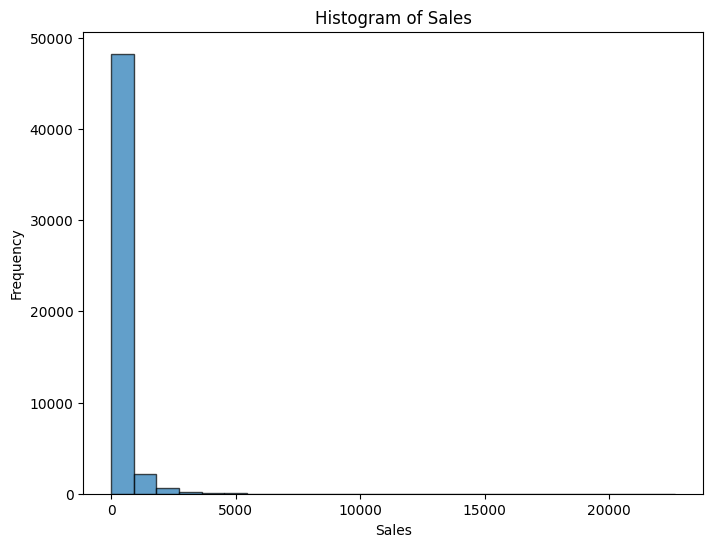

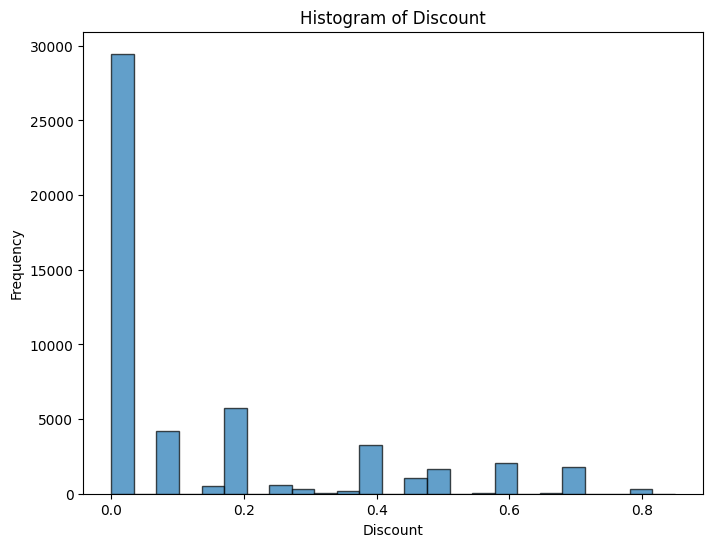

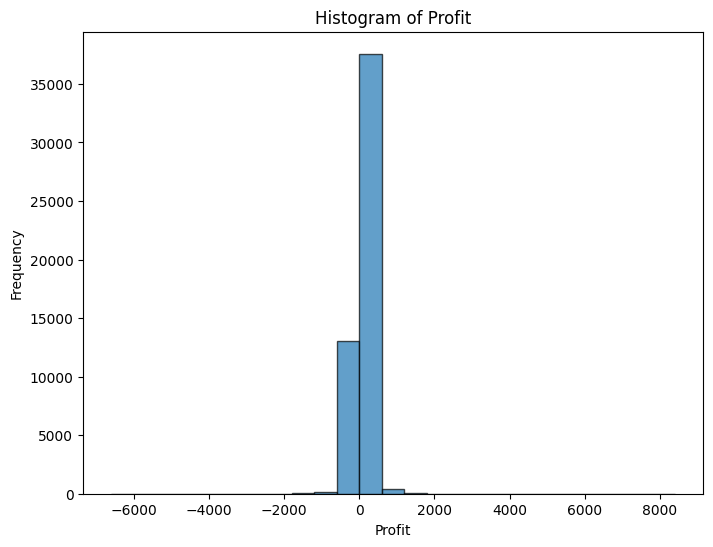

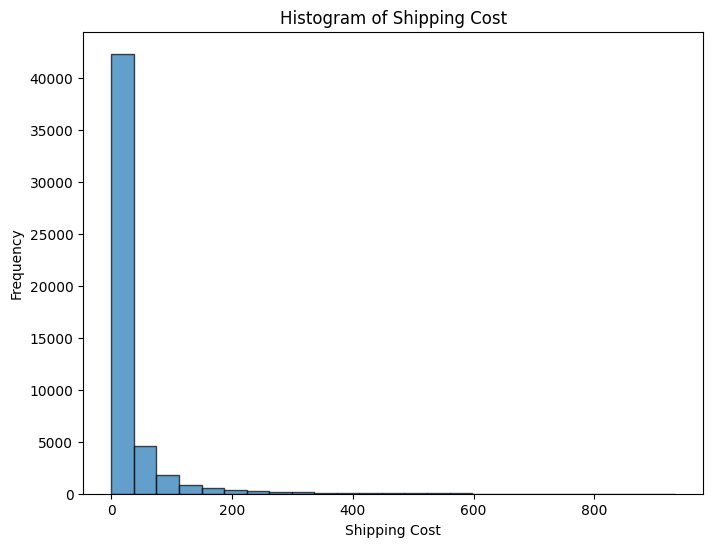

In [20]:
continuous_columns = df.select_dtypes(include=['float']).columns

for column in continuous_columns:
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    df[column].plot(kind='hist', bins=25, edgecolor='black', alpha=0.7)
    
    # Add titles and labels
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()



In [21]:
#Now we can work on our actual data analysis based on certain questions.

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Year', 'Month'],
      dtype='object')

In [23]:
# total profit untill now
#total sales 
# total Quantity
#average discount overall
#
# year wise - Sales,Quantity,profit 
# overall profit and sales according to the country 
# category wise - Sales,profit
# same question but year wise 
# country wise --- category --- sales
#  year --- sub category --- Quantity,sales,profit
# correlation analysis
# -- Sales vs. Quantity: Check if the quantity of items ordered correlates with total sales.
#--Profit vs. Sales: Check if there's a relationship between the profit and the total sales value.
#--Discount vs. Profit: Investigate whether the discount percentage has an impact on the profit made.
#--Shipping Cost vs. Sales/Profit:Check if shipping costs are related to sales or profit.
#--Discount vs. Quantity: Investigate if a discount affects the quantity of items ordered.

In [24]:
# Total profit 

In [25]:
Total_profit=df['Profit'].sum()
print('Total profit:',Total_profit)

Total profit: 1467457.29128


In [26]:
#Total Sales
Total_sales=df['Sales'].sum()
print('Total Sales:',Total_sales)

Total Sales: 12642501.909880001


In [27]:
#Total Quantity
Total_Quantity=df['Quantity'].sum()
print("Total Quantity:",Total_Quantity)

Total Quantity: 178312


In [28]:
#Average discount
Average_discount=df['Discount'].mean()
print('Average discount:',Average_discount)

Average discount: 0.14290754533047378


In [29]:
# Sales, Profit, Quantity according to year.

In [30]:
yearly_basis=df.groupby('Year').agg({'Sales':'sum','Profit':'sum','Quantity':'sum'})
print("Sales,profit,Quantity on the basis of Year:")
print()
yearly_basis=yearly_basis.reset_index()
yearly_basis


Sales,profit,Quantity on the basis of Year:



,Year,Sales,Profit,Quantity
0,2011,2.259451e+06,248940.81154,31443
1,2012,2.677439e+06,307415.27910,38111
2,2013,3.405746e+06,406935.23018,48136
3,2014,4.299866e+06,504165.97046,60622


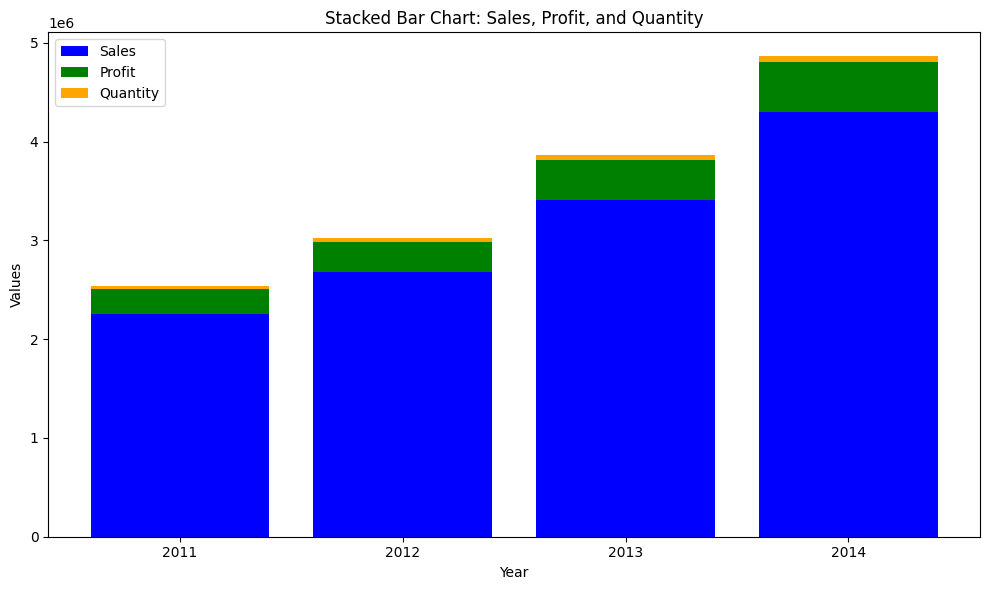

In [31]:

years = yearly_basis['Year']
sales =yearly_basis['Sales']
profit = yearly_basis['Profit']
quantity = yearly_basis['Quantity']




x = np.arange(len(years))

# Plot stacked bars
plt.figure(figsize=(10, 6))
plt.bar(x, sales, label='Sales', color='blue')
plt.bar(x, profit, bottom=sales, label='Profit', color='green')
plt.bar(x, quantity, bottom=np.array(sales) + np.array(profit), label='Quantity', color='orange')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Stacked Bar Chart: Sales, Profit, and Quantity')
plt.xticks(ticks=x, labels=years)  # Set x-axis labels as years
plt.legend()

# Adjust layout and show
plt.tight_layout()
plt.show()

In [32]:
#observstion: Sales keeps on increasing with the increasing year. 

In [33]:
#Sales,profit,Quantity according to Country
country_basis=df.groupby('Country').agg({'Sales':'sum','Profit':'sum','Quantity':'sum'})
top_10_countries = country_basis.nlargest(10, 'Sales') #orderby sales
top_10_countries=top_10_countries.reset_index()
print('Sales,profit,Quantity according to Country:')
print()
top_10_countries

Sales,profit,Quantity according to Country:



,Country,Sales,Profit,Quantity
0,United States,2.297201e+06,286397.02170,37873
1,Australia,9.252359e+05,103907.43300,10673
2,France,8.589311e+05,109029.00300,10804
3,China,7.005620e+05,150683.08500,7081
4,Germany,6.288400e+05,107322.82050,7745
5,Mexico,6.225906e+05,102818.09752,10011
6,India,5.896501e+05,129071.83500,5758
7,United Kingdom,5.285763e+05,111900.15000,6161
8,Indonesia,4.048875e+05,15608.67790,5237
9,Brazil,3.611064e+05,30090.49896,6148


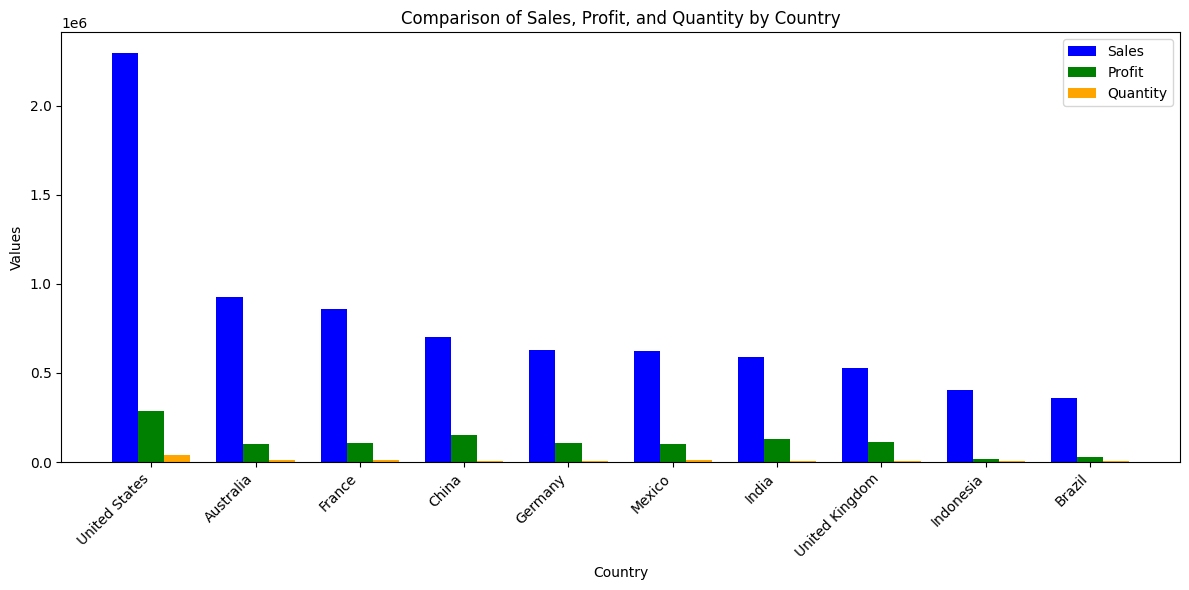

In [34]:
# Extract data
countries = top_10_countries['Country']
sales = top_10_countries['Sales']
profit = top_10_countries['Profit']
quantity = top_10_countries['Quantity']

# Define bar positions
x = np.arange(len(countries))  # Positions for bars on x-axis
width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each group of bars
plt.bar(x - width, sales, width=width, label='Sales', color='blue')
plt.bar(x, profit, width=width, label='Profit', color='green')
plt.bar(x + width, quantity, width=width, label='Quantity', color='orange')

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Comparison of Sales, Profit, and Quantity by Country')
plt.xticks(ticks=x, labels=countries, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [35]:
#observation: United States,Australia,France are the TOP 3 countries with highest sales. 
             # But in terms of profit  United States--France--Australia are the top 3 according to rank.
             

In [36]:
# category wise --- Sales,profit,quantity
Category_basis=df.groupby(['Category']).agg({'Sales':'sum','Profit':'sum','Quantity':'sum'})
Category_basis=Category_basis.reset_index()
print('Sales,prfoit,Quantity according to category:')
print()
Category_basis



Sales,prfoit,Quantity according to category:



,Category,Sales,Profit,Quantity
0,Furniture,4.110874e+06,285204.72380,34954
1,Office Supplies,3.787070e+06,518473.83430,108182
2,Technology,4.744557e+06,663778.73318,35176


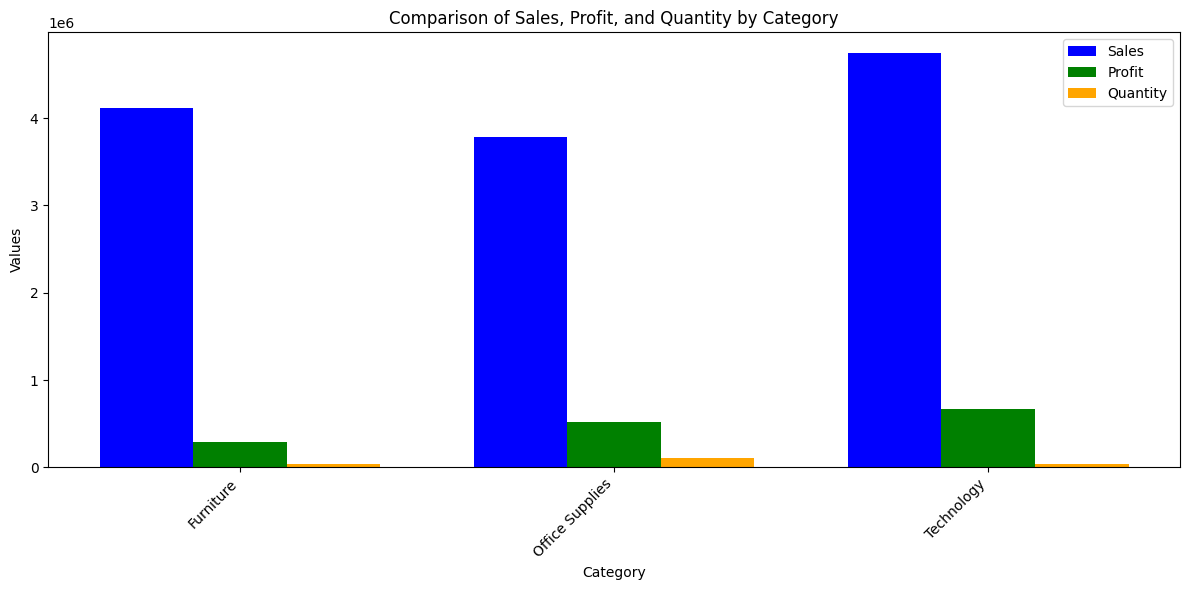

In [37]:
Category = Category_basis['Category']
sales = Category_basis['Sales']
profit = Category_basis['Profit']
quantity = Category_basis['Quantity']

# Define bar positions
x = np.arange(len(Category))  # Positions for bars on x-axis
width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each group of bars
plt.bar(x - width, sales, width=width, label='Sales', color='blue')
plt.bar(x, profit, width=width, label='Profit', color='green')
plt.bar(x + width, quantity, width=width, label='Quantity', color='orange')

# Add labels, title, and legend
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Comparison of Sales, Profit, and Quantity by Category')
plt.xticks(ticks=x, labels=Category, rotation=45, ha='right')  # Set x-axis labels
plt.legend()
#doubt
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [38]:
#observation: Technology is the category with the highest sales and Profit.

In [39]:
#category wise---year wise - Sales,profit
yearly_Category_basis=df.groupby(['Year','Category']).agg({'Sales':'sum','Profit':'sum','Quantity':'sum'})
yearly_Category_basis=yearly_Category_basis.reset_index()
print('Sales,Profit,Quantity according to category of each year:')
print()
yearly_Category_basis

Sales,Profit,Quantity according to category of each year:



,Year,Category,Sales,Profit,Quantity
0,2011,Furniture,7.561924e+05,53696.92640,6309
1,2011,Office Supplies,6.756065e+05,85996.53430,18976
2,2011,Technology,8.276521e+05,109247.35084,6158
3,2012,Furniture,8.589026e+05,58132.83400,7279
4,2012,Office Supplies,7.950946e+05,103305.50780,23135
5,2012,Technology,1.023442e+06,145976.93730,7697
6,2013,Furniture,1.117724e+06,84062.90050,9700
7,2013,Office Supplies,1.010718e+06,149245.73580,29147
8,2013,Technology,1.277305e+06,173626.59388,9289
9,2014,Furniture,1.378056e+06,89312.06290,11666


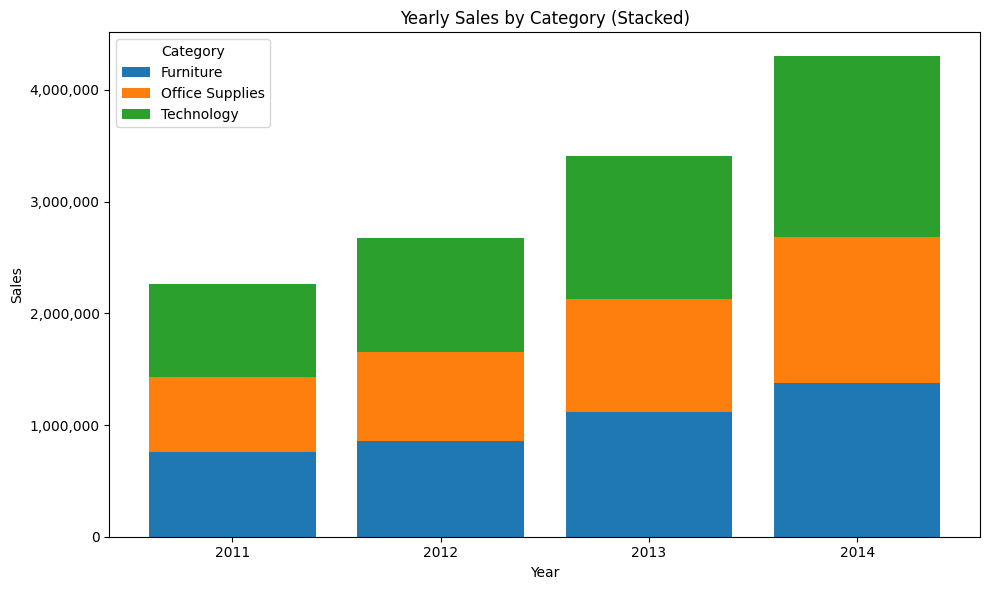

In [40]:
categories = ['Furniture', 'Office Supplies', 'Technology']
years = sorted(set(yearly_Category_basis['Year']))
sales = {category: [] for category in categories}

# Group sales data by category
for year in years:
    for category in categories:
        sales[category].append(
            next(val for idx, val in enumerate(yearly_Category_basis['Sales']) if yearly_Category_basis['Year'][idx] == year and yearly_Category_basis['Category'][idx] == category)
        )

# Plot stacked bar chart
x = np.arange(len(years))  # Bar positions

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(years))  # Start stacking from the bottom

for category in categories:
    ax.bar(x, sales[category], label=category, bottom=bottom)
    bottom += sales[category]  # Update the bottom for the next stack

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Yearly Sales by Category (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title='Category')

# Format y-axis with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [41]:
#country wise --- category --- sales,proft,quantity
Country_Category_basis=df.groupby(['Country','Category']).agg({'Sales':'sum'})
Country_Category_basis=Country_Category_basis.nlargest(20, 'Sales')
#Country_Category_basis=Country_Category_basis.sort_values(by=Country_Category_basis['Sales'],ascending=False, inplace=False)
#DataFrame.sort_values(by=column_name, ascending=True/False, inplace=False)
Country_Category_basis=Country_Category_basis.reset_index()


# doubt
print('Sales,Profit,Quantity according to category for each country:')
print()
Country_Category_basis


Sales,Profit,Quantity according to category for each country:



,Country,Category,Sales
0,United States,Technology,836154.03300
1,United States,Furniture,741999.79530
2,United States,Office Supplies,719047.03200
3,Australia,Technology,340212.44400
4,Australia,Furniture,339239.86800
5,France,Technology,312050.41800
6,France,Office Supplies,304763.53800
7,China,Furniture,276611.58000
8,China,Technology,263514.91500
9,Germany,Technology,262256.00100


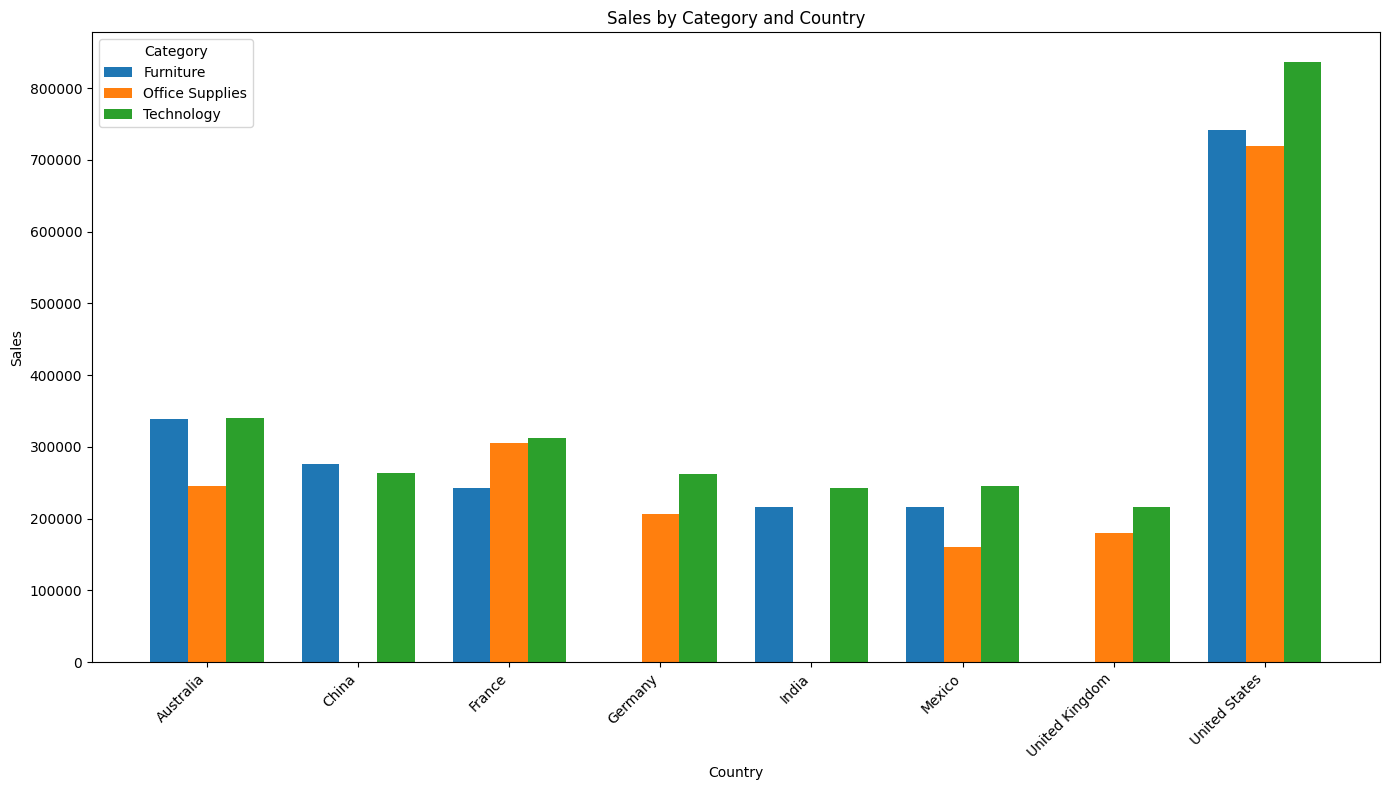

In [42]:


# Pivot the data for grouped bar chart
pivot_df = Country_Category_basis.pivot(index='Country', columns='Category', values='Sales').fillna(0)

# Plotting
categories = pivot_df.columns  # Categories: Technology, Furniture, Office Supplies
x = np.arange(len(pivot_df))   # Number of countries
width = 0.25                   # Bar width

plt.figure(figsize=(14, 8))

# Create a bar for each category
for i, category in enumerate(categories):
    plt.bar(x + i * width, pivot_df[category], width=width, label=category)

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales by Category and Country')
plt.xticks(ticks=x + width, labels=pivot_df.index, rotation=45, ha='right')
plt.legend(title='Category')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
#observation: united states - Technology
          #   United Kingdom - Technology
         #    Mexico - Technology
        #     India - Technology
       #      Germany- Technology 
      #conclusion: Technology is the category with the highest sales

Profit according to category for each country:



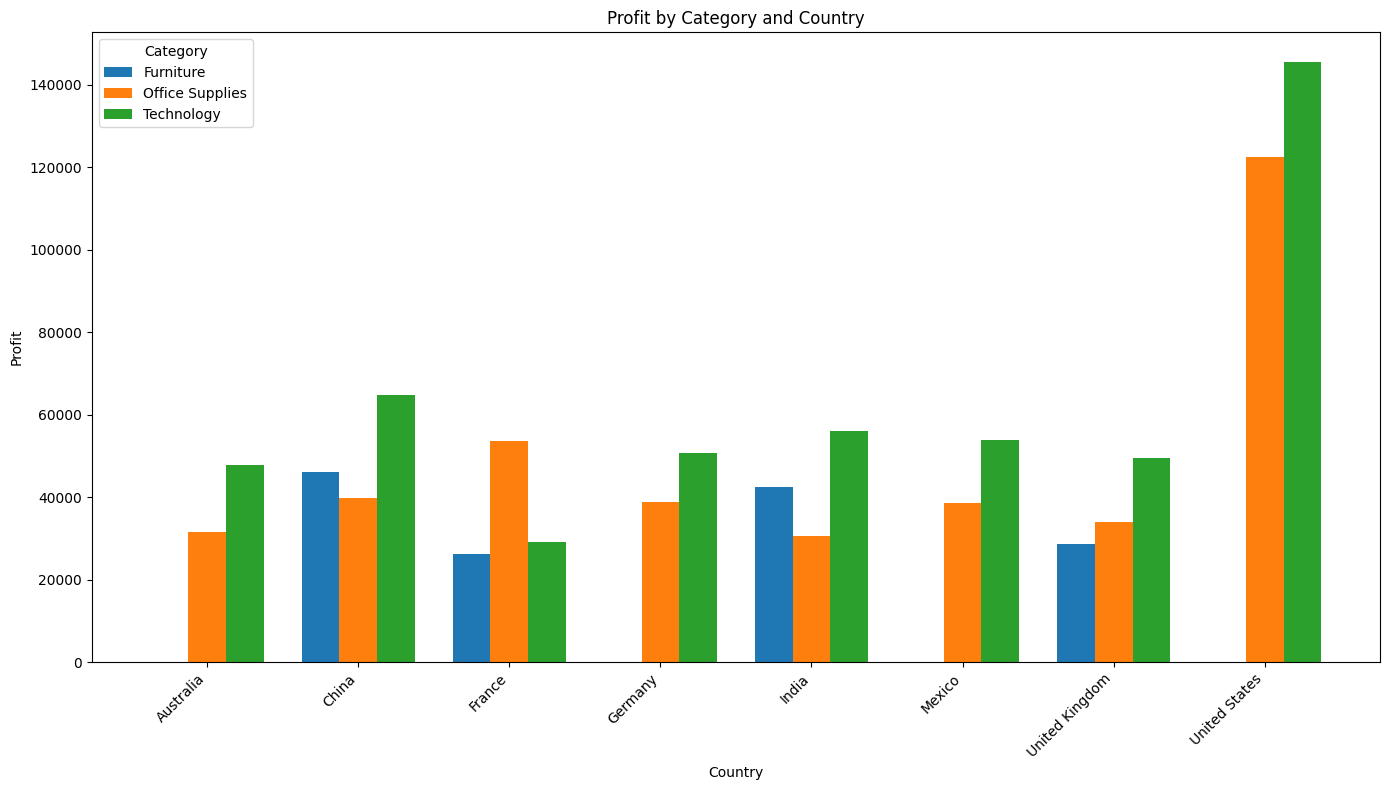

In [43]:
#country wise --- category --- proft
Country_Category_basis=df.groupby(['Country','Category']).agg({'Profit':'sum'})
Country_Category_basis=Country_Category_basis.nlargest(20, 'Profit')
#Country_Category_basis=Country_Category_basis.sort_values(by=Country_Category_basis['Sales'],ascending=False, inplace=False)
#DataFrame.sort_values(by=column_name, ascending=True/False, inplace=False)
Country_Category_basis=Country_Category_basis.reset_index()


# doubt
print('Profit according to category for each country:')
print()
Country_Category_basis


# Pivot the data for grouped bar chart
pivot_df = Country_Category_basis.pivot(index='Country', columns='Category', values='Profit').fillna(0)

# Plotting
categories = pivot_df.columns  # Categories: Technology, Furniture, Office Supplies
x = np.arange(len(pivot_df))   # Number of countries
width = 0.25                   # Bar width

plt.figure(figsize=(14, 8))

# Create a bar for each category
for i, category in enumerate(categories):
    plt.bar(x + i * width, pivot_df[category], width=width, label=category)

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Profit by Category and Country')
plt.xticks(ticks=x + width, labels=pivot_df.index, rotation=45, ha='right')
plt.legend(title='Category')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
# observation: most profitable category is Technology 

Quantity according to category for each country:



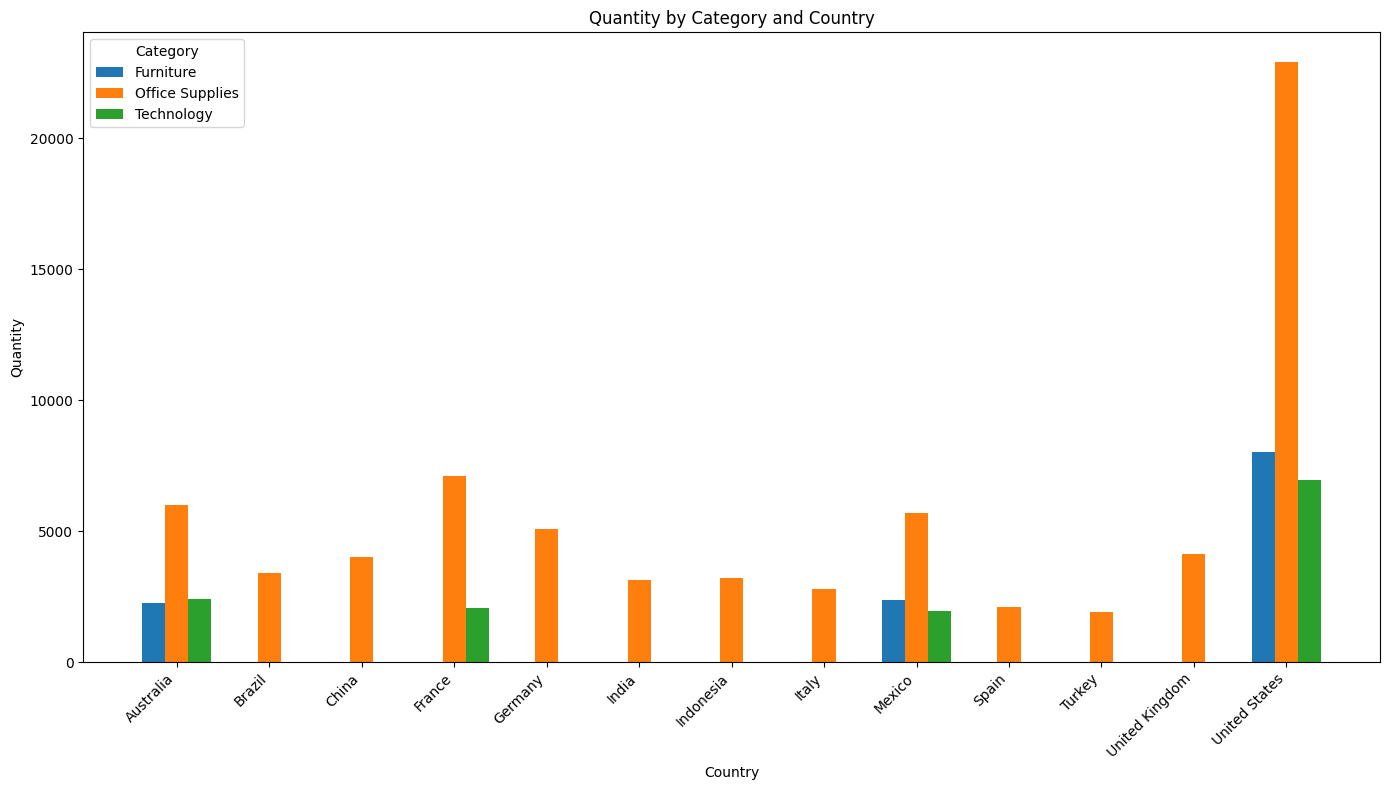

In [44]:
#country wise --- category --- proft
Country_Category_basis=df.groupby(['Country','Category']).agg({'Quantity':'sum'})
Country_Category_basis=Country_Category_basis.nlargest(20, 'Quantity')
#Country_Category_basis=Country_Category_basis.sort_values(by=Country_Category_basis['Sales'],ascending=False, inplace=False)
#DataFrame.sort_values(by=column_name, ascending=True/False, inplace=False)
Country_Category_basis=Country_Category_basis.reset_index()


# doubt
print('Quantity according to category for each country:')
print()
Country_Category_basis


# Pivot the data for grouped bar chart
pivot_df = Country_Category_basis.pivot(index='Country', columns='Category', values='Quantity').fillna(0)

# Plotting
categories = pivot_df.columns  # Categories: Technology, Furniture, Office Supplies
x = np.arange(len(pivot_df))   # Number of countries
width = 0.25                   # Bar width

plt.figure(figsize=(14, 8))

# Create a bar for each category
for i, category in enumerate(categories):
    plt.bar(x + i * width, pivot_df[category], width=width, label=category)

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity by Category and Country')
plt.xticks(ticks=x + width, labels=pivot_df.index, rotation=45, ha='right')
plt.legend(title='Category')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [45]:
Sub_Category_basis=df.groupby(['Sub-Category']).agg({'Sales':'sum','Profit':'sum','Quantity':'sum'})
Sub_Category_basis=Sub_Category_basis.nlargest(10, 'Sales')
Sub_Category_basis=Sub_Category_basis.reset_index()
Sub_Category_basis

,Sub-Category,Sales,Profit,Quantity
0,Phones,1.706824e+06,216717.00580,11870
1,Copiers,1.509436e+06,258567.54818,7454
2,Chairs,1.501682e+06,140396.26750,12336
3,Bookcases,1.466572e+06,161924.41950,8310
4,Storage,1.127086e+06,108461.48980,16917
5,Appliances,1.011064e+06,141680.58940,6078
6,Machines,7.790601e+05,58867.87300,4906
7,Tables,7.570419e+05,-64083.38870,3083
8,Accessories,7.492370e+05,129626.30620,10946
9,Binders,4.619115e+05,72449.84600,21429


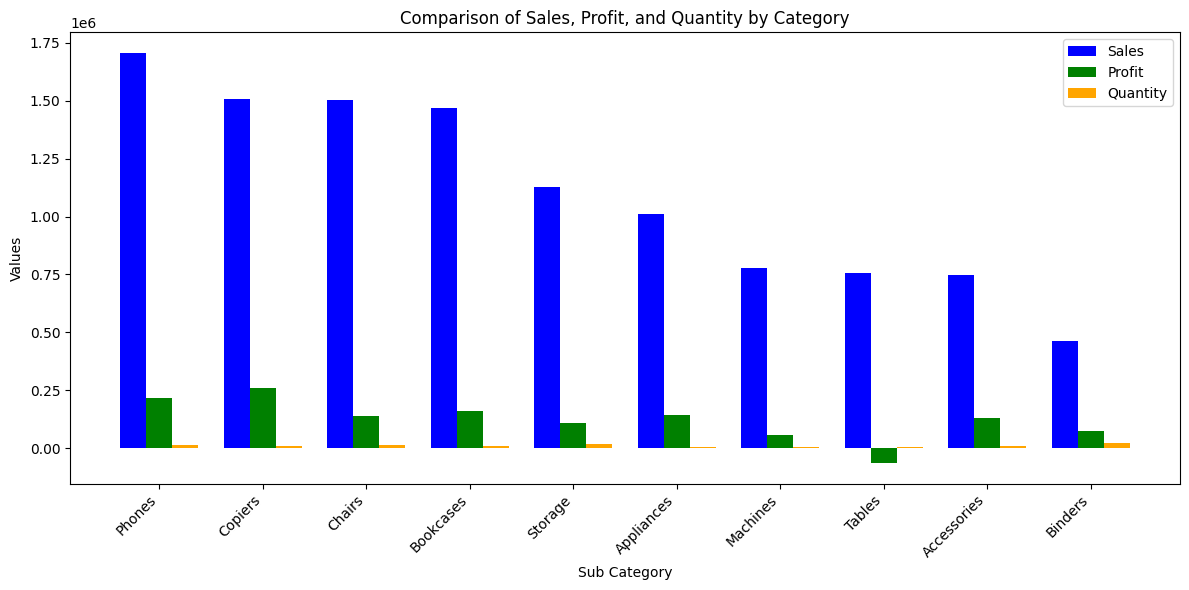

In [46]:
Sub_Category = Sub_Category_basis['Sub-Category']
sales = Sub_Category_basis['Sales']
profit = Sub_Category_basis['Profit']
quantity = Sub_Category_basis['Quantity']

# Define bar positions
x = np.arange(len(Sub_Category))  # Positions for bars on x-axis
width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each group of bars
plt.bar(x - width, sales, width=width, label='Sales', color='blue')
plt.bar(x, profit, width=width, label='Profit', color='green')
plt.bar(x + width, quantity, width=width, label='Quantity', color='orange')

# Add labels, title, and legend
plt.xlabel('Sub Category')
plt.ylabel('Values')
plt.title('Comparison of Sales, Profit, and Quantity by Category')
plt.xticks(ticks=x, labels=Sub_Category, rotation=45, ha='right')  # Set x-axis labels
plt.legend()
#doubt
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [47]:
#observation: Phones are the most sold item.
#             Copiers are the most profitable item.
#             Tables are the item in loss.

# correlation analysis


In [48]:


# Assuming df is your DataFrame
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Year']

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                  Sales  Quantity  Discount    Profit  Shipping Cost      Year
Sales          1.000000  0.313577 -0.086722  0.484918       0.768073 -0.002905
Quantity       0.313577  1.000000 -0.019875  0.104365       0.272649 -0.005049
Discount      -0.086722 -0.019875  1.000000 -0.316490      -0.079056 -0.005894
Profit         0.484918  0.104365 -0.316490  1.000000       0.354441  0.002626
Shipping Cost  0.768073  0.272649 -0.079056  0.354441       1.000000 -0.003136
Year          -0.002905 -0.005049 -0.005894  0.002626      -0.003136  1.000000


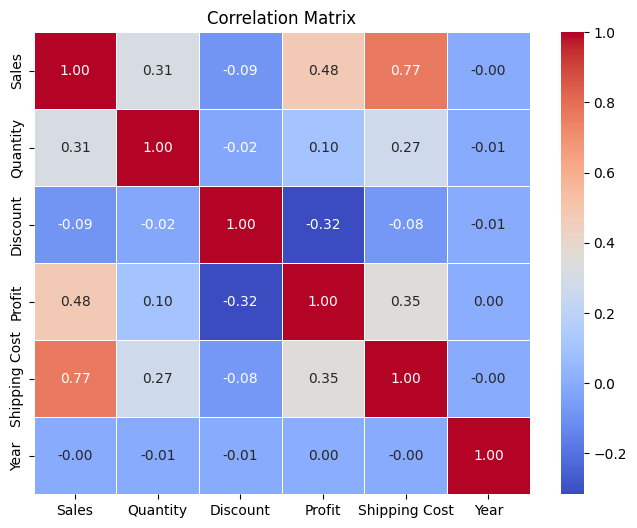

In [49]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [50]:
#observation: profit and Discount are negatively co-related, which means a the dicount is allowed more the profit falls and viceversa.
#             Sales and profit are positively co-related.

In [51]:
#Who are the top customers contributing to revenue?
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Year', 'Month'],
      dtype='object')

In [52]:
customer=df.groupby(['Customer Name']).agg({'Sales':'sum'})
customer=customer.nlargest(10,'Sales')
customer=customer.reset_index()
customer

,Customer Name,Sales
0,Tom Ashbrook,40488.07080
1,Tamara Chand,37457.33300
2,Greg Tran,35550.95428
3,Christopher Conant,35187.07640
4,Sean Miller,35170.93296
5,Bart Watters,32310.44650
6,Natalie Fritzler,31781.25850
7,Fred Hopkins,30400.67452
8,Jane Waco,30288.45030
9,Hunter Lopez,30243.56658


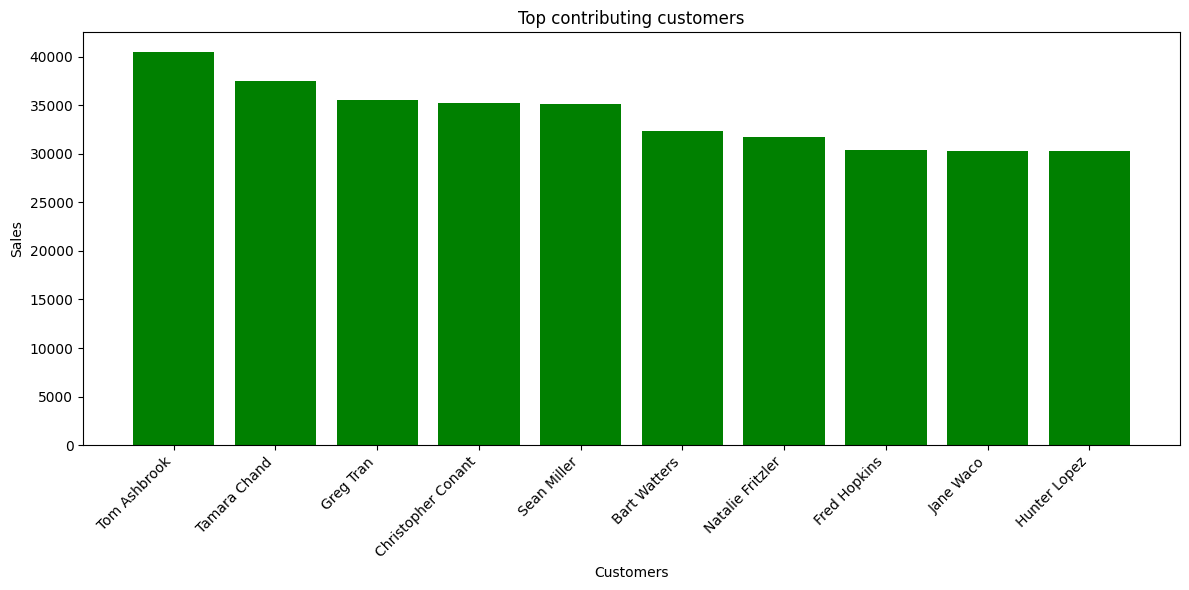

In [53]:
plt.figure(figsize=(12, 6))
plt.bar(customer['Customer Name'],customer['Sales'], color='Green')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Top contributing customers')
plt.xticks(ticks=x, labels=customer['Customer Name'], rotation=45, ha='right')  # Set x-axis labels
plt.tight_layout()
plt.show()

In [54]:
#How efficient are shipping processes (e.g., delivery times, delays)?
Ship_mode=df.groupby(['Ship Mode']).agg({'Order ID':'count'})
Ship_mode=Ship_mode.reset_index()
Ship_mode

,Ship Mode,Order ID
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


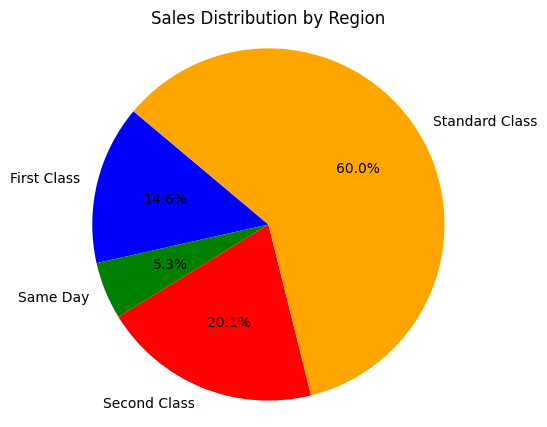

In [55]:
plt.figure(figsize=(5,5))  # Optional: Set figure size
plt.pie(Ship_mode['Order ID'], labels=Ship_mode['Ship Mode'], colors=['blue', 'green', 'red', 'orange'], autopct='%1.1f%%', startangle=140)

# Optional: Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# Add title
plt.title('Sales Distribution by Region')

# Display the pie chart
plt.show()

In [56]:
#observation: Most of the ordered is delivered from the Stantard Class from all other mode of shipping.

In [57]:
#Which regions or products have the highest shipping costs?
Ship_cost_region=df.groupby(['Region']).agg({'Shipping Cost':'sum'})
Ship_cost_region=Ship_cost_region.nlargest(10,'Shipping Cost')
Ship_cost_region=Ship_cost_region.reset_index()
Ship_cost_region

,Region,Shipping Cost
0,Central,296940.56
1,South,168474.07
2,North,131474.09
3,Oceania,120628.51
4,North Asia,95030.61
5,Southeast Asia,93675.84
6,EMEA,88375.73
7,Africa,88139.47
8,Central Asia,77830.15
9,West,76512.26


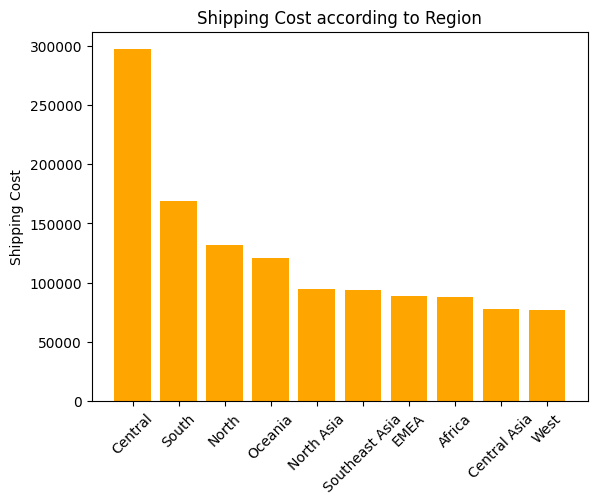

In [58]:
plt.bar(Ship_cost_region['Region'],Ship_cost_region["Shipping Cost"],color='Orange')
plt.xticks(rotation=45)
plt.title('Shipping Cost according to Region')
plt.ylabel('Shipping Cost')
plt.show()

In [59]:
#observation: The shipping cost is highest in central region.

In [60]:
#Which regions or markets contribute the most to revenue?
Sales_region=df.groupby(['Region']).agg({'Sales':'sum'})
Sales_region=Sales_region.nsmallest(13,'Sales')
Sales_region=Sales_region.reset_index()

Sales_region['Sales'] = Sales_region['Sales'].apply(lambda x: f"{int(x):,}")
Sales_region

,Region,Sales
0,Canada,"66,928"
1,Caribbean,"324,280"
2,East,"678,781"
3,West,"725,457"
4,Central Asia,"752,826"
5,Africa,"783,773"
6,EMEA,"806,161"
7,North Asia,"848,309"
8,Southeast Asia,"884,423"
9,Oceania,"1,100,184"


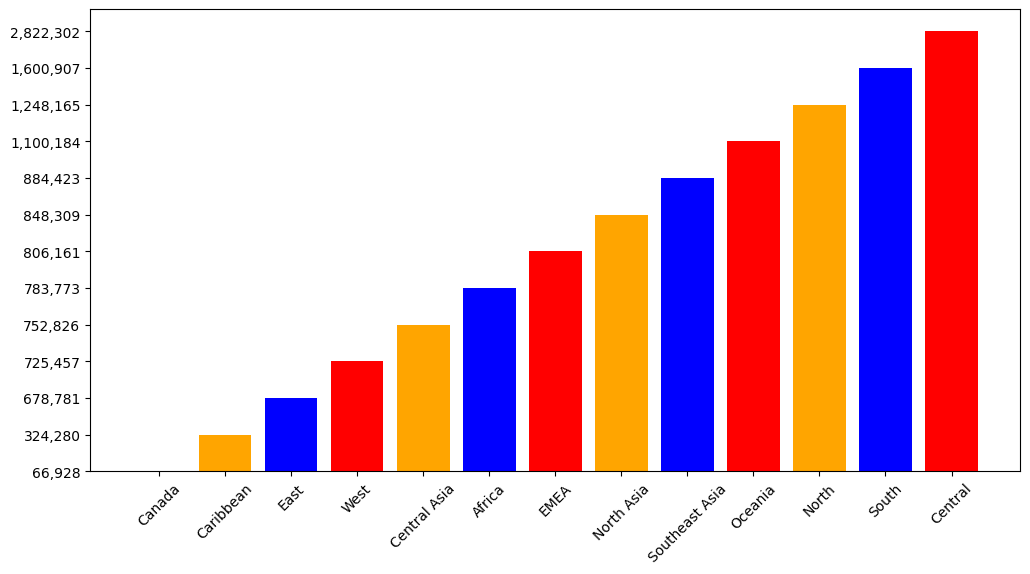

In [61]:
plt.figure(figsize=(12,6))
plt.bar(Sales_region['Region'],Sales_region['Sales'],color=['red','Orange','Blue'])
plt.xticks(rotation=45)
plt.show()

In [62]:
#observation: The central region is the region with the highest sales.

In [63]:
#avg sales , profit of month and year
Avg_sales_profit=df.groupby(['Month']).agg({'Sales':'mean','Profit':'mean'})
Avg_sales_profit=Avg_sales_profit.nsmallest(13,'Sales')
Avg_sales_profit=Avg_sales_profit.reset_index()

Avg_sales_profit

,Month,Sales,Profit
0,April,228.512009,24.047639
1,July,236.696727,24.658905
2,June,238.176093,27.589461
3,September,240.565709,28.525219
4,May,241.262967,27.891589
5,November,244.603807,27.664693
6,February,250.802297,32.717804
7,December,250.837952,27.089516
8,March,253.871809,31.000831
9,August,254.791880,29.904315


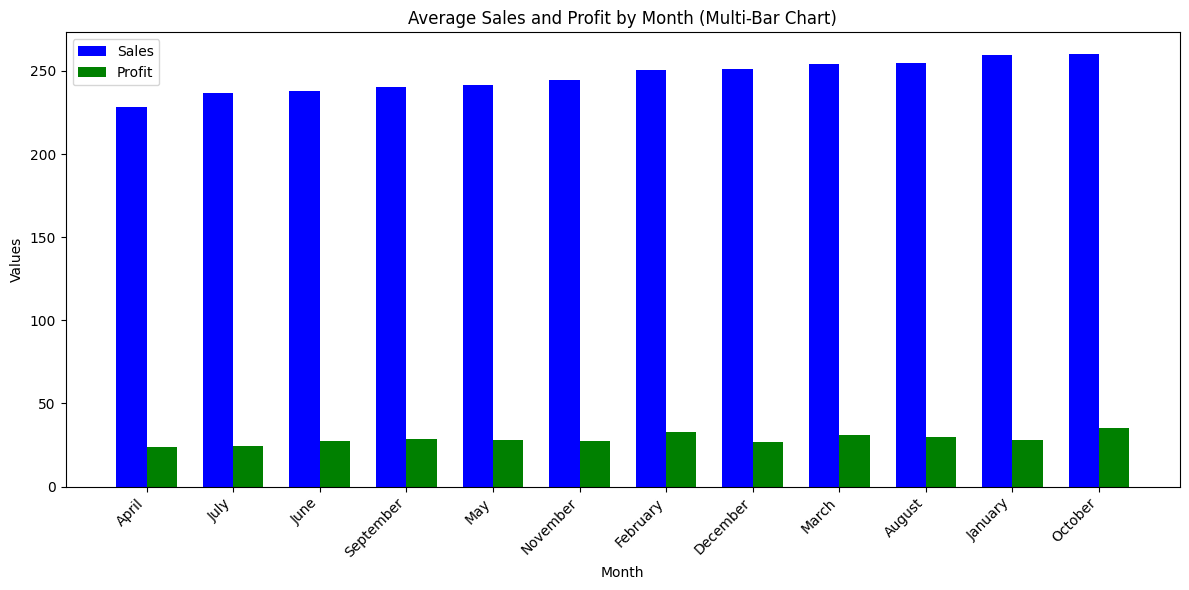

In [64]:
Month=Avg_sales_profit['Month']
Sales=Avg_sales_profit['Sales']
Profit=Avg_sales_profit['Profit']
# Define positions for bars
x = np.arange(len(Month))  # Positions for the bars on the x-axis
width = 0.35  # Width of each bar

# Create the multi-bar plot
plt.figure(figsize=(12, 6))

# Plot bars for Sales and Profit
plt.bar(x - width/2, Sales, width, label='Sales', color='blue')
plt.bar(x + width/2, Profit, width, label='Profit', color='green')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Average Sales and Profit by Month (Multi-Bar Chart)')
plt.xticks(ticks=x, labels=Month, rotation=45, ha='right')  # Add month labels to x-axis
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [65]:
#observation: Average sales and profit is at the peak in the month of October and January.

In [66]:
Avg_sales_profit=df.groupby(['Year']).agg({'Sales':'mean','Profit':'mean'})
Avg_sales_profit=Avg_sales_profit.nsmallest(13,'Sales')
Avg_sales_profit=Avg_sales_profit.reset_index()

Avg_sales_profit

,Year,Sales,Profit
0,2012,244.247281,28.043722
1,2014,245.272139,28.758540
2,2013,246.811106,29.490197
3,2011,251.105901,27.666238


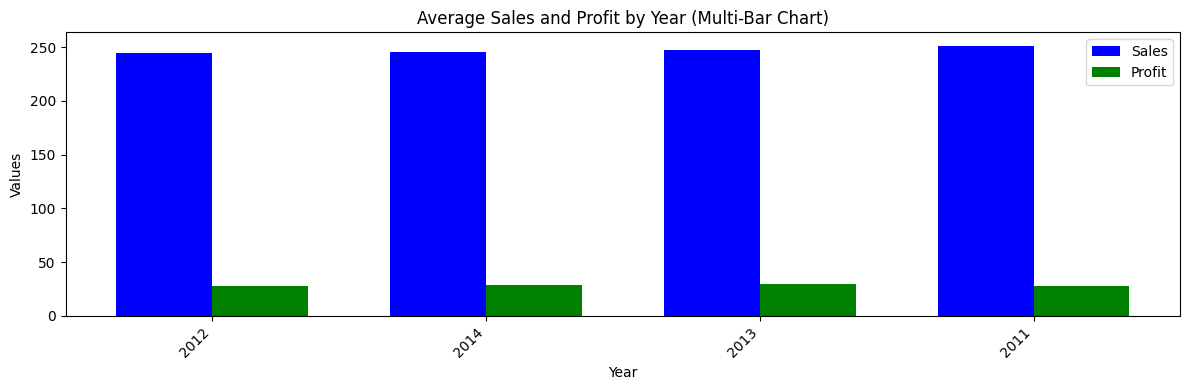

In [67]:
Year=Avg_sales_profit['Year']
Sales=Avg_sales_profit['Sales']
Profit=Avg_sales_profit['Profit']
# Define positions for bars
x = np.arange(len(Year))  # Positions for the bars on the x-axis
width = 0.35  # Width of each bar

# Create the multi-bar plot
plt.figure(figsize=(12, 4))

# Plot bars for Sales and Profit
plt.bar(x - width/2, Sales, width, label='Sales', color='blue')
plt.bar(x + width/2, Profit, width, label='Profit', color='green')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Average Sales and Profit by Year (Multi-Bar Chart)')
plt.xticks(ticks=x, labels=Year, rotation=45, ha='right')  # Add month labels to x-axis
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [68]:
#observation: There is a very slow increase in the average sales and profit over the years.